In [1]:
# import sys

# print("--sys.version—")
# print(sys.version)
# print(sys.executable)
# print(sys.path)
# sys.path.append("/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages")

In [2]:
# 1/2.BC압력

# - 제어압력에 비례하는 공기 브레이크실린더 압력(Braking Compressor) 입니다.

# - 주로 압력센서에 의해 측정되며 제동력에 비례합니다.

# - 신분당선이 6량(6개 객차가 연결됨)이어서 #5, #6번은 없는게 맞습니다.



# 3. Target speed: 무시하셔도 됩니다.

#   Permitted speed: 제한속도로 생각하시면 됩니다.

#   Actual speed: 열차현재속도 (현재 로깅하고 있는 장치가 측정, 이를 기준으로 하시면 됩니다.)

#   Train speed: 다른 열차제어컴퓨터가 측정한 속도

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = '20180713.csv'
df = pd.read_csv(f'..//Data//metroKOR//{filename}')
print(df.columns)

Index(['번호', '시간', 'FWD', 'REV', 'P/B', 'Motoring', 'Braking',
       'Train In Station', 'OP Mode', 'Target Speed', 'Permitted Speed',
       'Actual Speed', 'DISTANCE', 'Train Speed', 'VOBC ＃1', 'VOBC ＃0',
       'MR Pressure', 'Master Clock of VOBC', 'Line Voltage',
       'Train In Station.1', 'Next Platform ID', 'Final Platform ID',
       'Distance to Target', 'BC ＃1', 'BC ＃2', 'BC ＃3', 'BC ＃4', 'Unnamed: 27',
       'Unnamed: 28', 'BC ＃7', 'BC ＃0', 'Train Room Temp ＃1',
       'Train Outside Temp ＃1', '편성번호', '열차길이'],
      dtype='object')


In [5]:
# for a in range(43004):
#     if not df['Train In Station'][a] == df['Train In Station.1'][a]:
#         print('!')

In [6]:
# print(df['OP Mode'].unique())
# print(df['편성번호'].unique()) 
# print(df['열차길이'].unique())
# print(df['VOBC ＃1'].unique())
# print(df['VOBC ＃0'].unique())

In [3]:
df.rename({'BC ＃1': 'BC1', 'BC ＃2': 'BC2', 'BC ＃3': 'BC3', 
           'BC ＃4': 'BC4', 'BC ＃7': 'BC5', 'BC ＃0': 'BC6'}, axis=1, inplace=True)
# df.drop(['번호', 'OP Mode', '편성번호', '열차길이', 'VOBC ＃1', 'VOBC ＃0',
#          'Master Clock of VOBC', 'Train In Station.1',
#          'Next Platform ID', 'Final Platform ID',
#          'Unnamed: 27', 'Unnamed: 28', 'Target Speed',
#          'Train Room Temp ＃1', 'Train Outside Temp ＃1',
#          'FWD', 'REV', 'Train In Station', 'Line Voltage',
#          'DISTANCE', 'MR Pressure', 'Distance to Target'
#         ], axis=1, inplace=True)
df.drop(['번호', 'OP Mode', '편성번호', '열차길이', 'VOBC ＃1', 'VOBC ＃0',
         'Master Clock of VOBC', 'Train In Station.1',
         'Next Platform ID', 'Final Platform ID',
         'Unnamed: 27', 'Unnamed: 28', 'Target Speed',
         'Train Room Temp ＃1', 'Train Outside Temp ＃1',
         'Train In Station', 'Line Voltage',
         'MR Pressure', 'Distance to Target'
        ], axis=1, inplace=True)




In [4]:
df

,시간,FWD,REV,P/B,Motoring,Braking,Permitted Speed,Actual Speed,DISTANCE,Train Speed,BC1,BC2,BC3,BC4,BC5,BC6
0,12:02:40,1,0,71 (%),1,0,50 (km/h),40 (km/h),111 (m),41 (km/h),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa)
1,12:02:41,1,0,71 (%),1,0,90 (km/h),43 (km/h),128 (m),43 (km/h),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa)
2,12:02:42,1,0,65 (%),1,0,90 (km/h),46 (km/h),139 (m),46 (km/h),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa)
3,12:02:43,1,0,63 (%),1,0,90 (km/h),48 (km/h),151 (m),48 (km/h),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa)
4,12:02:44,1,0,63 (%),1,0,90 (km/h),48 (km/h),164 (m),48 (km/h),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42999,23:59:55,0,0,0 (%),0,0,0 (km/h),0 (km/h),2554 (m),0 (km/h),330 (kPa),327 (kPa),324 (kPa),288 (kPa),336 (kPa),336 (kPa)
43000,23:59:56,0,0,0 (%),0,0,0 (km/h),0 (km/h),2554 (m),0 (km/h),330 (kPa),327 (kPa),324 (kPa),288 (kPa),336 (kPa),333 (kPa)
43001,23:59:57,0,0,0 (%),0,0,0 (km/h),0 (km/h),2554 (m),0 (km/h),330 (kPa),327 (kPa),324 (kPa),288 (kPa),336 (kPa),336 (kPa)
43002,23:59:58,0,0,0 (%),0,0,0 (km/h),0 (km/h),2554 (m),0 (km/h),330 (kPa),327 (kPa),324 (kPa),288 (kPa),333 (kPa),336 (kPa)


In [5]:
df.rename(columns={'시간': 'time'}, inplace=True)
df.columns = df.columns.str.lower()

In [6]:
df['time'] = pd.to_datetime(filename[:-4] + df['time'].str.replace(':', ''))
#df['time'] = df['time'].str.replace(':', '')
#df['time'] = df['time'].astype('int64')

In [7]:
df['p/b'] = df['p/b'].str[:-3]
df['p/b'] = df['p/b'].astype('int64')
df['distance'] = df['distance'].str[:-3]
df['distance'] = df['distance'].astype('int64')

In [8]:
speedwords = ['permitted', 'actual', 'train']
for word in speedwords:
    df[f'{word} speed'] = df[f'{word} speed'].str[:-6]
    df[f'{word} speed'] = df[f'{word} speed'].astype('int64')

In [9]:
for i in range(1, 7):
    df[f'bc{i}'] = df[f'bc{i}'].str[:-5]
    df[f'bc{i}'] = df[f'bc{i}'].astype('float64')

In [10]:
# threewords = ['p/b', 'distance', 'line voltage', 'distance to target']

# # 'p/b' (%)
# # 'distance' (m)
# # 'line voltage' (V)
# # 'distance to target' (m)

# for word in threewords:
#     df[f'{word}'] = df[f'{word}'].str[:-3]
#     df[f'{word}'] = df[f'{word}'].astype('int64')

# df['mr pressure'] = df['mr pressure'].str[:-5] #(mpa?) (kpa?)
# df['mr pressure'] = df['mr pressure'].str.replace('．', '.')
# df['mr pressure'] = df['mr pressure'].astype('float64')

# for i in range(1, 7):
#     df[f'bc{i}'] = df[f'bc{i}'].str[:-5]
#     df[f'bc{i}'] = df[f'bc{i}'].astype('float64')

# speedwords = ['permitted', 'actual', 'train']
# for word in speedwords:
#     df[f'{word} speed'] = df[f'{word} speed'].str[:-6]
#     df[f'{word} speed'] = df[f'{word} speed'].astype('int64')

In [11]:
# print(df.shape)
# print(df.dtypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43004 entries, 0 to 43003
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   time             43004 non-null  datetime64[ns]
 1   fwd              43004 non-null  int64         
 2   rev              43004 non-null  int64         
 3   p/b              43004 non-null  int64         
 4   motoring         43004 non-null  int64         
 5   braking          43004 non-null  int64         
 6   permitted speed  43004 non-null  int64         
 7   actual speed     43004 non-null  int64         
 8   distance         43004 non-null  int64         
 9   train speed      43004 non-null  int64         
 10  bc1              43004 non-null  float64       
 11  bc2              43004 non-null  float64       
 12  bc3              43004 non-null  float64       
 13  bc4              43004 non-null  float64       
 14  bc5              43004 non-null  float

In [12]:
df.describe() # 통계값들


,fwd,rev,p/b,motoring,braking,permitted speed,actual speed,distance,train speed,bc1,bc2,bc3,bc4,bc5,bc6
count,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000
mean,0.478072,0.424123,-2.674286,0.365571,0.433448,46.706748,39.484374,1670.239396,38.985722,73.215166,66.095433,63.080295,68.806483,65.729048,72.230560
std,0.499525,0.494215,39.284994,0.481595,0.495557,33.687426,34.349977,1676.838522,33.929602,101.571522,101.030534,100.444586,90.750764,103.455092,102.598315
min,0.000000,0.000000,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-43.000000,0.000000,0.000000,10.000000,0.000000,333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,44.000000,1463.000000,43.000000,39.000000,21.000000,0.000000,39.000000,18.000000,36.000000
75%,1.000000,1.000000,19.000000,1.000000,1.000000,86.000000,68.000000,2387.000000,67.000000,132.000000,126.000000,120.000000,132.000000,123.000000,132.000000
max,1.000000,1.000000,100.000000,1.000000,1.000000,90.000000,92.000000,8261.000000,91.000000,345.000000,333.000000,330.000000,300.000000,345.000000,345.000000


In [17]:
# #df.count()
# df = df[['time', 'p/b', 'motoring', 'braking', 'train speed', 'permitted speed', 'train in station', 'distance to target'
#          #'permitted speed', 'train speed', #'target speed', 'actual speed', 
#          #'distance to target', 'train in station'
#         ]]


In [13]:
df.iloc[110:120]

,time,fwd,rev,p/b,motoring,braking,permitted speed,actual speed,distance,train speed,bc1,bc2,bc3,bc4,bc5,bc6
110,2018-07-13 12:04:30,1,0,-43,0,1,50,0,0,0,132.0,132.0,126.0,138.0,126.0,147.0
111,2018-07-13 12:04:31,1,0,-43,0,1,50,0,0,0,132.0,132.0,126.0,138.0,126.0,147.0
112,2018-07-13 12:04:32,1,0,-43,0,1,50,0,0,0,132.0,132.0,126.0,138.0,126.0,150.0
113,2018-07-13 12:04:33,1,0,-43,0,1,50,0,0,0,132.0,132.0,126.0,138.0,126.0,147.0
114,2018-07-13 12:04:34,1,0,-43,0,1,50,0,0,0,132.0,132.0,126.0,138.0,126.0,147.0
115,2018-07-13 12:04:35,1,0,-35,1,0,50,0,0,0,132.0,132.0,120.0,138.0,117.0,126.0
116,2018-07-13 12:04:36,1,0,3,1,0,50,0,0,0,39.0,51.0,51.0,45.0,45.0,42.0
117,2018-07-13 12:04:37,1,0,3,1,0,50,0,0,0,0.0,18.0,0.0,0.0,0.0,0.0
118,2018-07-13 12:04:38,1,0,43,1,0,50,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
119,2018-07-13 12:04:39,1,0,81,1,0,50,3,2,2,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df[(df['motoring'] == 1) & (df['p/b'] < 0)]

,time,fwd,rev,p/b,motoring,braking,permitted speed,actual speed,distance,train speed,bc1,bc2,bc3,bc4,bc5,bc6
115,2018-07-13 12:04:35,1,0,-35,1,0,50,0,0,0,132.0,132.0,120.0,138.0,117.0,126.0
559,2018-07-13 12:11:59,1,0,-3,1,0,90,87,6015,85,30.0,0.0,0.0,36.0,18.0,36.0
802,2018-07-13 12:16:02,1,0,-3,1,0,90,86,2233,85,24.0,0.0,0.0,27.0,0.0,33.0
904,2018-07-13 12:17:44,1,0,-41,1,0,50,0,0,0,123.0,126.0,111.0,108.0,108.0,117.0
1210,2018-07-13 12:22:50,1,0,-43,1,0,50,0,0,0,123.0,123.0,120.0,138.0,117.0,138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38179,2018-07-13 22:39:32,1,0,-3,1,0,62,56,1560,55,33.0,0.0,21.0,57.0,24.0,39.0
38317,2018-07-13 22:41:50,1,0,-3,1,0,20,18,191,17,33.0,21.0,18.0,39.0,18.0,36.0
38669,2018-07-13 22:47:42,1,0,-3,1,0,10,7,2375,7,51.0,24.0,21.0,42.0,24.0,42.0
38739,2018-07-13 22:48:52,1,0,-35,1,0,5,0,2503,0,144.0,123.0,114.0,132.0,114.0,123.0


In [15]:
df.head()

,time,fwd,rev,p/b,motoring,braking,permitted speed,actual speed,distance,train speed,bc1,bc2,bc3,bc4,bc5,bc6
0,2018-07-13 12:02:40,1,0,71,1,0,50,40,111,41,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-07-13 12:02:41,1,0,71,1,0,90,43,128,43,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-07-13 12:02:42,1,0,65,1,0,90,46,139,46,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-07-13 12:02:43,1,0,63,1,0,90,48,151,48,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-07-13 12:02:44,1,0,63,1,0,90,48,164,48,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df.tail()

,time,fwd,rev,p/b,motoring,braking,permitted speed,actual speed,distance,train speed,bc1,bc2,bc3,bc4,bc5,bc6
42999,2018-07-13 23:59:55,0,0,0,0,0,0,0,2554,0,330.0,327.0,324.0,288.0,336.0,336.0
43000,2018-07-13 23:59:56,0,0,0,0,0,0,0,2554,0,330.0,327.0,324.0,288.0,336.0,333.0
43001,2018-07-13 23:59:57,0,0,0,0,0,0,0,2554,0,330.0,327.0,324.0,288.0,336.0,336.0
43002,2018-07-13 23:59:58,0,0,0,0,0,0,0,2554,0,330.0,327.0,324.0,288.0,333.0,336.0
43003,2018-07-13 23:59:59,0,0,0,0,0,0,0,2554,0,330.0,327.0,321.0,288.0,336.0,336.0


In [16]:
#df.dtypes

In [17]:
#df.plot(x='time', y='train speed', figsize = (200, 10))#, kind = 'scatter')

In [18]:
#df.plot(x='time', y='p/b', figsize = (200, 10))

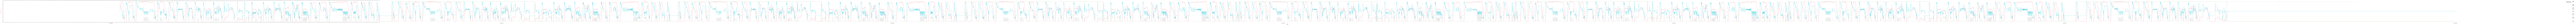

In [17]:
plt.rcParams['figure.figsize'] = [500, 5]
# plt.plot(df.time, df['train speed'], label='train speed', color='#FC9399')
# plt.plot(df.time, df['braking'], label='fwd', color='#68D6E4')
# plt.legend(fontsize=15, loc='best')
# plt.show()

fig, ax1 = plt.subplots()
color = '#FC9399'
ax1.set_xlabel('time')
ax1.set_ylabel('actual speed', color=color)
ax1.plot(df.time, df['actual speed'], label='actual speed', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = '#68D6E4'
ax2.set_ylabel('comparing element', color=color)  # we already handled the x-label with ax1
ax2.plot(df.time, df['p/b'], label='p/b', color=color) 
# comparing elements: p/b, motoring, braking, distance to target, train in station, permitted speed

ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylim(0.0, 2.0)

ax3 = ax1.twinx()
ax3.plot(df.time, df['fwd'], label='braking', color='#B9CEAC')

ax4 = ax1.twinx()
ax4.plot(df.time, df['bc4'], label='motoring', color='#E0E0E0')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend(fontsize=15, loc='best')

plt.show()

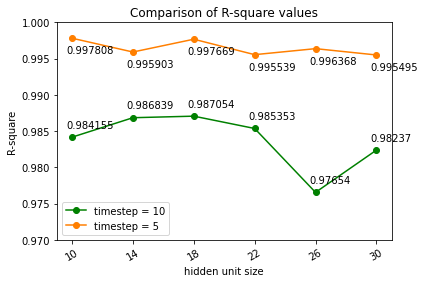

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# figure 준비
fig = plt.figure()
fig.patch.set_facecolor('white')

# subplot 생성
ax = fig.add_subplot(1,1,1)        # (a,b,c) : a행 b열의 c번째에 subplot 생성

# plot 그리기
graph_switch = 'R' # R or M

if graph_switch == 'R':
    # R-square
    x = [0.984155, 0.986839, 0.987054, 0.985353, 0.976540, 0.982370]
    y = [0.997808, 0.995903, 0.997669, 0.995539, 0.996368, 0.995495]

elif graph_switch == 'M':
    # MAE
    x = [2.557902, 2.077027, 2.355539, 2.326874, 2.791779, 2.512525]
    y = [1.010268, 1.161985, 1.032149, 1.289326, 1.102973, 1.279223]

data = pd.DataFrame(x, 
                    columns=['timestep=10'])
data2 = pd.DataFrame(y, 
                     columns=['timestep=5'])

line = ax.plot(data['timestep=10'], color='g', label='timestep=10', marker='o')#, linestyle='--', )
line2 = ax.plot(data2['timestep=5'], color='#FF7F00', label='timestep=5', marker='o')

if graph_switch == 'R':
    ax.set_title('Comparison of R-square values') # plot 제목 설정
    ax.set_ylabel('R-square')   # y축 이름
    ax.set_ylim([0.97, 1])            # y축 범위
    plt.legend(['timestep = 10', 'timestep = 5'], loc='lower left')
    
    for idx, value in enumerate(x):
        plt.text(idx-0.1, x[idx]+0.001, x[idx], 
             horizontalalignment='left',
             verticalalignment='bottom')
    for idx, value in enumerate(y):
        plt.text(idx-0.1, y[idx]-0.001, y[idx],
             horizontalalignment='left',
             verticalalignment='top')
    
elif graph_switch == 'M':
    ax.set_title('Comparison of MAE values')
    ax.set_ylabel('MAE')
    ax.set_ylim([1, 3])
    plt.legend(['timestep = 10', 'timestep = 5'], loc='center right')
    
    for idx, value in enumerate(x):
        plt.text(idx-0.1, x[idx]+0.05, x[idx], 
             horizontalalignment='left',
             verticalalignment='bottom')
    for idx, value in enumerate(y):
        plt.text(idx-0.1, y[idx]+0.05, y[idx],
             horizontalalignment='left',
             verticalalignment='bottom')
    
ax.set_xlabel('hidden unit size')   # x축 이름
ax.set_xticks([0, 1, 2, 3, 4, 5])   # x축 눈금 지정(정수)
ax.set_xticklabels(['10', '14', '18', '22', '26', '30'], rotation=30, fontsize=10)    # x축 눈금 지정(문자열)



if graph_switch == 'R':
    plt.savefig('R-square.png', transparent=False)
elif graph_switch == 'M':
    plt.savefig('MAE.png', transparent=False)

In [1]:
import numpy as np
import pandas as pd
import os
import argparse
import pickle
import warnings
from MetroLSTMCore import ModelCore

warnings.filterwarnings('ignore')
np.random.seed(20201005)


#######


#######




In [2]:
from scipy.stats import hmean
predicted_step = 10

def preprocessing(file_name):

    df = pd.read_csv(f'..//Data//metroKOR//{file_name}')

    df.rename({'BC ＃1': 'BC1', 'BC ＃2': 'BC2', 'BC ＃3': 'BC3',
               'BC ＃4': 'BC4', 'BC ＃7': 'BC5', 'BC ＃0': 'BC6'},
              axis=1, inplace=True)

    df.drop(['번호', 'OP Mode', '편성번호', '열차길이', 'VOBC ＃1', 'VOBC ＃0',
             'Master Clock of VOBC', 'Train In Station.1',
             'Next Platform ID', 'Final Platform ID',
             'Unnamed: 27', 'Unnamed: 28', 'Target Speed',
             'Train Room Temp ＃1', 'Train Outside Temp ＃1',
             'FWD', 'REV', 'Train In Station', 'Line Voltage',
             'DISTANCE', 'MR Pressure', 'Distance to Target'],
            axis=1, inplace=True)

    df.rename(columns={'시간': 'time'}, inplace=True)
    df.columns = df.columns.str.lower()
    df['time'] = pd.to_datetime(file_name[:-4] + df['time'].str.replace(':', ''))
    df["hour"] = df["time"].dt.hour
    df["dayOfWeek"] = df["time"].dt.dayofweek
    df["rest"] = df["dayOfWeek"] > 4 # 0-mon
    df["day"] = df["time"].dt.day
    df.drop(["time"], axis=1, inplace=True)

    df['p/b'] = df['p/b'].str[:-3]
    df['p/b'] = df['p/b'].astype('int64')

    speedwords = ['permitted', 'actual', 'train']
    for word in speedwords:
        df[f'{word} speed'] = df[f'{word} speed'].str[:-6]
        df[f'{word} speed'] = df[f'{word} speed'].astype('int64')

    for i in range(1, 7):
        df[f'bc{i}'] = df[f'bc{i}'].str[:-5]
        df[f'bc{i}'] = df[f'bc{i}'].astype('float64')
    df['harmonic_bc'] = hmean(df.loc[:, 'bc1':'bc6'], axis=1)
    return df


def flag_setting(df_lst):

    for ind, df in enumerate(df_lst):
        df['FLAG'] = ind

    return df_lst


def data_concat(df_lst):

    concatd_data = pd.concat(df_lst, ignore_index=True, axis=0)
    with open('..//Data//concatd_data.pkl', 'wb') as f:
        pickle.dump(concatd_data, f)

    return concatd_data


### TODO
def feature_engineering(dataAll, predictStep=[10]):
    """
    Main function of this file. Indeed, this part proceeds the feature engineering.

    :param dataAll: dataframe.
    :param predictStep: array of timesteps.
    :return: newdata: feature-selected dataframe array.
    """
    FLAG = dataAll["FLAG"].unique()
    newData = []

    print("=======")
    for flag in FLAG:
        print("Running with the file {}:".format(flag))
        data = dataAll[dataAll["FLAG"] == flag]

        data.reset_index(inplace=True, drop=True)
        data.reset_index(inplace=True)
        data.rename({"index": "timeStep"}, axis=1, inplace=True)

        print("lagging features")
        data = lagging_features(data,
                                name="actual speed",
                                laggingStep=list(range(1, 11)) + [20, 30, 50, 80])

        print('.')
        data = lagging_features(data,
                                name='permitted speed',
                                laggingStep=list(range(1, 11)) + [20, 30, 50, 80])

        print('.')
        data = lagging_features(data,
                                name="p/b",
                                #laggingStep=list(range(1, 6)) + [20, 60])
                                #laggingStep=list(range(1, 11)) + [20, 30, 50, 80])
                                laggingStep=[1, 3, 5, 20, 60])

        print('.')
        # for i in range(1, 7):
        #     data = lagging_features(data,
        #                             name=f"bc{i}",
        #                             #laggingStep=list(range(1, 6)) + [20, 60])
        #                             #laggingStep=list(range(1, 11)) + [20, 30, 50, 80])
        #                             laggingStep=[1, 3, 5, 20, 60])

        print('.')
        data['speed_mult_0'] = data['actual speed']
        for k in range(1, 6):
            data[f'speed_mult_{k}'] = data[f'speed_mult_{k-1}'] * data[f'lagged_actual speed_{k}']
        print('complete')
        print("statistical features")
        for k in [2, 5, 10, 20]:
            data = statistical_features(data,
                                        name='actual speed',
                                        timeRange=k)
            print('.')
            data = statistical_features(data,
                                        name='permitted speed',
                                        timeRange=k)
            print('.')
            data = statistical_features(data,
                                        name='p/b',
                                        timeRange=k)
            print('.')
            # for i in range(1, 7):
            #     data = statistical_features(data,
            #                                 name=f'bc{i}',
            #                                 timeRange=k)
        print('complete')
        print("Marking the timestep flag with the target")
        data = create_target(data,
                             predictStep=predictStep,
                             targetName="actual speed")
        data = data[~data["target"].isnull()]
        data.reset_index(inplace=True, drop=True)
        newData.append(data)
        print('complete')
    print("=======")

    return newData
### TODO



def lagging_features(data,
                     name=None,
                     laggingStep=[1, 2, 3]):

    assert name, "Invalid feature name."

    for step in laggingStep:
        tmpframe = data[[name, "timeStep"]].copy()
        tmpframe.rename({name: "lagged_" + f'{name}_' + str(step)}, axis=1, inplace=True)
        tmpframe["timeStep"] += step
        data = pd.merge(data, tmpframe, on="timeStep", how="left")

    return data


def statistical_features(data,
                         name=None,
                         timeRange=5):

    assert name, "Invalid feature name."
    index = list(data.index)
    featureValues = data[name].values
    Means = []
    Stds = []
    Diffs = []

    for currInd in index:
        tmp = featureValues[max(0, currInd - timeRange):currInd]
        Means.append(np.nanmean(tmp))
        Stds.append(np.nanstd(tmp))
        Diffs.append(featureValues[currInd] - featureValues[max(0, currInd - timeRange)])

    data[name + "_lag_mean_" + str(timeRange)] = Means
    data[name + "_lag_std_" + str(timeRange)] = Stds
    data[name + "_diff_" + str(timeRange)] = Diffs

    return data


def create_target(data,
                  predictStep=None,
                  targetName="actual speed"):

    target = data[targetName].copy()
    newData = pd.DataFrame(None, columns=list(data.columns), dtype=np.float64)
    newData["target"] = None
    newData["timeFlag"] = None

    for step in predictStep:
        targetTmp = target[step:].copy()
        data["target"] = targetTmp.reset_index(drop=True)
        data["timeFlag"] = step
        newData = pd.concat([newData, data], axis=0, ignore_index=True)
    newData["timeFlag"] = newData["timeFlag"].astype(np.float64)

    return newData



In [3]:
if __name__ == "__main__":
    filenames = ['20180717.csv', '20180713.csv']
    dfs = []
    for filename in filenames:
        dtf = preprocessing(filename)
        dfs.append(dtf)
    dfs = flag_setting(dfs)
    dataframe = data_concat(dfs)

    dataAll = feature_engineering(dataframe, predictStep=[predicted_step])
    print("\nMerging the data:")
    print("=======")
    shapeList = [len(df) for df in dataAll]
    print(f"Total shape is {sum(shapeList)}")
    newData = pd.DataFrame(None, columns=list(dataAll[0].columns))
    for idx, data in enumerate(dataAll):
        print(f"{idx}: {len(data)}.")
        newData = pd.concat([newData, data], axis=0, ignore_index=True)
    print("=======")

    dropList = ['train speed', "timeStep", "hour", "dayOfWeek", "rest", "day", "timeFlag", 'speed_mult_0']
    for i in range(1, 7):
        dropList.append(f'bc{i}')
    # dropList.append('motoring')
    # dropList.append('braking')
    newData.drop(dropList, axis=1, inplace=True)



Running with the file 0:
lagging features
.
.
.
.
complete
statistical features
.
.
.
.
.
.
.
.
.
.
.
.
complete
Marking the timestep flag with the target
complete
Running with the file 1:
lagging features
.
.
.
.
complete
statistical features
.
.
.
.
.
.
.
.
.
.
.
.
complete
Marking the timestep flag with the target
complete

Merging the data:
Total shape is 86053
0: 43059.
1: 42994.


In [4]:
newData

,p/b,motoring,braking,permitted speed,actual speed,harmonic_bc,FLAG,lagged_actual speed_1,lagged_actual speed_2,lagged_actual speed_3,...,actual speed_lag_mean_20,actual speed_lag_std_20,actual speed_diff_20,permitted speed_lag_mean_20,permitted speed_lag_std_20,permitted speed_diff_20,p/b_lag_mean_20,p/b_lag_std_20,p/b_diff_20,target
0,82.0,1.0,0.0,50.0,25.0,0.000000,0.0,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,52.0
1,79.0,1.0,0.0,50.0,28.0,0.000000,0.0,25.0,NaN,NaN,...,25.000000,0.000000,3.0,50.0,0.0,0.0,82.000000,0.000000,-3.0,54.0
2,84.0,1.0,0.0,50.0,30.0,0.000000,0.0,28.0,25.0,NaN,...,26.500000,1.500000,5.0,50.0,0.0,0.0,80.500000,1.500000,2.0,54.0
3,90.0,1.0,0.0,50.0,35.0,0.000000,0.0,30.0,28.0,25.0,...,27.666667,2.054805,10.0,50.0,0.0,0.0,81.666667,2.054805,8.0,59.0
4,87.0,1.0,0.0,50.0,36.0,0.000000,0.0,35.0,30.0,28.0,...,29.500000,3.640055,11.0,50.0,0.0,0.0,83.750000,4.023369,5.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86048,0.0,0.0,0.0,0.0,0.0,322.126162,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
86049,0.0,0.0,0.0,0.0,0.0,322.746420,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
86050,0.0,0.0,0.0,0.0,0.0,322.590532,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
86051,0.0,0.0,0.0,0.0,0.0,322.126162,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [10]:
columns = newData.iloc[10000:, 80:]
columns

,target
10000,21.0
10001,19.0
10002,17.0
10003,17.0
10004,14.0
...,...
86048,0.0
86049,0.0
86050,0.0
86051,0.0
